In [1]:
# imports
import h2o 
import numpy as np
import pandas as pd
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.grid.grid_search import H2OGridSearch

In [2]:
# display matplotlib graphics in notebook
%matplotlib inline

In [3]:
# start and connect to h2o server
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_112"; Java(TM) SE Runtime Environment (build 1.8.0_112-b16); Java HotSpot(TM) 64-Bit Server VM (build 25.112-b16, mixed mode)
  Starting server from /Users/phall/anaconda/lib/python3.5/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/tc/0ss1l73113j3wdyjsxmy1j2r0000gn/T/tmp8kt5lpvj
  JVM stdout: /var/folders/tc/0ss1l73113j3wdyjsxmy1j2r0000gn/T/tmp8kt5lpvj/h2o_phall_started_from_python.out
  JVM stderr: /var/folders/tc/0ss1l73113j3wdyjsxmy1j2r0000gn/T/tmp8kt5lpvj/h2o_phall_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster version:,3.10.4.1
H2O cluster version age:,4 days
H2O cluster name:,H2O_from_python_phall_y0lpjr
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [5]:
# load clean data
path = '/Users/phall/workspace/GWU_data_mining/03_regression/data/loan_clean.csv'

In [6]:
# define input variable measurement levels 
# strings automatically parsed as enums (nominal)
# numbers automatically parsed as numeric
col_types = {'bad_loan': 'enum'}

In [7]:
frame = h2o.import_file(path=path, col_types=col_types) # multi-threaded import

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [8]:
frame.describe()

Rows:163987
Cols:18




,id,bad_loan,GRP_REP_home_ownership,GRP_addr_state,GRP_home_ownership,GRP_purpose,GRP_verification_status,_WARN_,STD_IMP_REP_annual_inc,STD_IMP_REP_delinq_2yrs,STD_IMP_REP_dti,STD_IMP_REP_emp_length,STD_IMP_REP_int_rate,STD_IMP_REP_loan_amnt,STD_IMP_REP_longest_credit_lengt,STD_IMP_REP_revol_util,STD_IMP_REP_term_length,STD_IMP_REP_total_acc
type,int,enum,int,int,int,int,int,int,real,real,real,real,real,real,real,real,real,real
mins,10001.0,,1.0,1.0,1.0,1.0,1.0,NaN,-1.767455639,-0.39219617,-2.119639396,-1.6213902740000001,-1.907046215,-1.587129405,-2.22445124,-2.164541326,-0.516495577,-2.058861889
mean,91994.0,,2.5740028172964924,11.409337325519703,2.5740028172964924,3.2449401476946345,2.340356247751345,0.0,2.38744452882879e-11,2.2959296297769782e-12,6.807013811211564e-11,-3.566867876239133e-11,-8.948753565861857e-12,8.311927579716105e-11,5.0612534090153816e-11,-1.4734128080190765e-11,-1.5009542966560638e-10,8.060924856225354e-13
maxs,173987.0,,5.0,37.0,5.0,14.0,3.0,NaN,4.6180619798,4.1566950661,3.0371487270000004,1.2288169612,2.8376799992,2.7671323946,3.1431598296,3.0363495275,1.9718787627,3.0684672884
sigma,47339.11363414683,,0.6675260435449262,9.971926133461404,0.6675260435449262,2.2672892075259754,0.5040864341768772,-0.0,0.9999999999982868,0.9999999999212518,1.0000000000037712,1.0000000000339833,1.0000000000199503,0.999999999985285,0.9999999999850594,1.000000000017688,1.0000000000642086,1.0000000000331841
zeros,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,163987,0,0,0,0,0,0,0,0,0,0
0,10001.0,0,3.0,14.0,3.0,3.0,2.0,nan,-1.1992995020000001,-0.39219617,1.5712460425,1.2288169612,-0.7047730510000001,-1.019182214,1.6839024850000002,1.1858716502,-0.516495577,-1.359278248
1,10002.0,1,3.0,10.0,3.0,8.0,2.0,nan,-1.04507688,-0.39219617,-1.9861534850000002,-1.6213902740000001,0.3572732234,-1.3347084310000001,-0.42059567400000003,-1.7882703350000002,1.9718787627,-1.7965180230000002
2,10003.0,0,3.0,7.0,3.0,7.0,3.0,nan,-1.501267394,-0.39219617,-0.9556422520000001,1.2288169612,0.5158905241,-1.34732948,-0.7212382690000001,1.7782983174,-0.516495577,-1.271830292


In [9]:
# split into 40% training, 30% validation, and 30% test
train, valid, test = frame.split_frame([0.4, 0.3])

In [10]:
# assign target and inputs
y = 'bad_loan'
X = [name for name in frame.columns if name not in ['id', '_WARN_', y]]
print(y)
print(X)

bad_loan
['GRP_REP_home_ownership', 'GRP_addr_state', 'GRP_home_ownership', 'GRP_purpose', 'GRP_verification_status', 'STD_IMP_REP_annual_inc', 'STD_IMP_REP_delinq_2yrs', 'STD_IMP_REP_dti', 'STD_IMP_REP_emp_length', 'STD_IMP_REP_int_rate', 'STD_IMP_REP_loan_amnt', 'STD_IMP_REP_longest_credit_lengt', 'STD_IMP_REP_revol_util', 'STD_IMP_REP_term_length', 'STD_IMP_REP_total_acc']


In [11]:
# set target to factor - for binary classification
train[y] = train[y].asfactor()
valid[y] = valid[y].asfactor()
test[y] = test[y].asfactor()

In [12]:
# neural network

# initialize nn model
nn_model = H2ODeepLearningEstimator(
    epochs=50,                    # read over the data 50 times, but in mini-batches
    hidden=[100],                 # 100 hidden units in 1 hidden layer
    input_dropout_ratio=0.2,      # randomly drop 20% of inputs for each iteration, helps w/ generalization
    hidden_dropout_ratios=[0.05], # randomly set 5% of hidden weights to 0 each iteration, helps w/ generalization
    activation='TanhWithDropout', # bounded activation function that allows for dropout, tanh
    l1=0.001,                     # L1 penalty can help generalization   
    l2=0.01,                      # L2 penalty can increase stability in presence of highly correlated inputs
    adaptive_rate=True,           # adjust magnitude of weight updates automatically (+stability, +accuracy)
    stopping_rounds=5,            # stop after validation error does not decrease for 5 iterations
    score_each_iteration=True,    # score validation error on every iteration
    model_id='nn_model')          # for easy lookup in flow

# train nn model
nn_model.train(
    x=X,
    y=y,
    training_frame=train,
    validation_frame=valid)

# print model information
nn_model

# view detailed results at http://localhost:54321/flow/index.html

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  nn_model


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.1452520113692281
RMSE: 0.38111941877740646
LogLoss: 0.45712178977282125
Mean Per-Class Error: 0.36361040117719945
AUC: 0.6830820167286246
Gini: 0.3661640334572491
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2051850611678882: 


,0,1,Error,Rate
0,5454.0,2616.0,0.3242,(2616.0/8070.0)
1,776.0,1144.0,0.4042,(776.0/1920.0)
Total,6230.0,3760.0,0.3395,(3392.0/9990.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2051851,0.4028169,227.0
max f2,0.1099829,0.5713632,335.0
max f0point5,0.3052271,0.3532737,140.0
max accuracy,0.5449050,0.8079079,1.0
max precision,0.5449050,0.6666667,1.0
max recall,0.0581078,1.0,397.0
max specificity,0.5484976,0.9998761,0.0
max absolute_mcc,0.2051851,0.2209483,227.0
max min_per_class_accuracy,0.1913184,0.6348958,242.0
max mean_per_class_accuracy,0.1953555,0.6363896,238.0


Gains/Lift Table: Avg response rate: 19.22 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100100,0.4931689,2.289375,2.289375,0.44,0.44,0.0229167,0.0229167,128.9375000,128.9375000
,2,0.0200200,0.4687924,2.3934375,2.3414062,0.46,0.45,0.0239583,0.046875,139.34375,134.1406250
,3,0.0300300,0.4494385,2.2373437,2.3067187,0.43,0.4433333,0.0223958,0.0692708,123.7343750,130.6718750
,4,0.0400400,0.4335451,1.9771875,2.2243359,0.38,0.4275,0.0197917,0.0890625,97.7187500,122.4335937
,5,0.0500501,0.4170543,2.3414062,2.24775,0.45,0.432,0.0234375,0.1125,134.1406250,124.7750000
,6,0.1,0.3545358,1.8038890,2.0260417,0.3466934,0.3893894,0.0901042,0.2026042,80.3889028,102.6041667
,7,0.1500501,0.3140481,1.7170313,1.9229695,0.33,0.3695797,0.0859375,0.2885417,71.703125,92.2969480
,8,0.2,0.2831896,1.4180862,1.796875,0.2725451,0.3453453,0.0708333,0.359375,41.8086172,79.6875
,9,0.3,0.2332474,1.4010417,1.6649306,0.2692693,0.3199867,0.1401042,0.4994792,40.1041667,66.4930556
,10,0.4,0.1955167,1.2083333,1.5507813,0.2322322,0.2980480,0.1208333,0.6203125,20.8333333,55.0781250




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.14648540704893587
RMSE: 0.38273412057058076
LogLoss: 0.4608619207348951
Mean Per-Class Error: 0.3726131790598498
AUC: 0.676116757076979
Gini: 0.3522335141539581
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20501133805712324: 


,0,1,Error,Rate
0,26777.0,13002.0,0.3269,(13002.0/39779.0)
1,4008.0,5530.0,0.4202,(4008.0/9538.0)
Total,30785.0,18532.0,0.3449,(17010.0/49317.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2050113,0.3940150,230.0
max f2,0.1121860,0.5675027,334.0
max f0point5,0.2744116,0.3513680,166.0
max accuracy,0.5433803,0.8066590,1.0
max precision,0.5433803,0.6363636,1.0
max recall,0.0537180,1.0,399.0
max specificity,0.5490653,0.9999497,0.0
max absolute_mcc,0.2321149,0.2086298,204.0
max min_per_class_accuracy,0.1907117,0.6243447,244.0
max mean_per_class_accuracy,0.1773530,0.6273868,259.0


Gains/Lift Table: Avg response rate: 19.34 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100168,0.4918716,2.4806228,2.4806228,0.4797571,0.4797571,0.0248480,0.0248480,148.0622789,148.0622789
,2,0.0200134,0.4688458,2.2863826,2.3836011,0.4421907,0.4609929,0.0228559,0.0477039,128.6382600,138.3601094
,3,0.0300099,0.4489740,2.2444306,2.3372423,0.4340771,0.4520270,0.0224366,0.0701405,124.4430626,133.7242283
,4,0.0400065,0.4312370,2.1395507,2.2878444,0.4137931,0.4424734,0.0213881,0.0915286,113.9550690,128.7844434
,5,0.0500030,0.4160418,1.8144229,2.1931985,0.3509128,0.4241687,0.0181380,0.1096666,81.4422889,119.3198521
,6,0.1000061,0.3580596,1.8849765,2.0390875,0.3645580,0.3943633,0.0942546,0.2039212,88.4976549,103.9087535
,7,0.1500091,0.3138638,1.6522375,1.9101375,0.3195458,0.3694242,0.0826169,0.2865381,65.2237509,91.0137526
,8,0.2000122,0.2825123,1.4698204,1.8000583,0.2842660,0.3481346,0.0734955,0.3600336,46.9820424,80.0058251
,9,0.2999980,0.2322259,1.3495310,1.6499028,0.2610018,0.3190943,0.1349339,0.4949675,34.9531035,64.9902813
,10,0.4000041,0.1966984,1.0798253,1.5073762,0.2088402,0.2915294,0.1079891,0.6029566,7.9825276,50.7376204



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2017-03-07 20:53:51,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2017-03-07 20:53:52,1.804 sec,89518 obs/sec,1.5243988,1,99903.0,0.3820454,0.4589820,0.6800826,2.3934375,0.3870871,0.3834589,0.4622733,0.6741717,2.4387557,0.3837419
,2017-03-07 20:53:53,2.979 sec,96262 obs/sec,3.0537262,2,200129.0,0.3830952,0.4616043,0.6811047,2.1332813,0.3315315,0.3846066,0.4651228,0.6737395,2.4701560,0.3696089
,2017-03-07 20:53:54,4.031 sec,102536 obs/sec,4.5779877,3,300023.0,0.3858647,0.4679883,0.6832742,2.4454687,0.3393393,0.3872585,0.4713859,0.6763954,2.4910896,0.3963948
,2017-03-07 20:53:55,5.137 sec,104233 obs/sec,6.1026611,4,399944.0,0.3816685,0.4584952,0.6797935,2.289375,0.3304304,0.3830739,0.4616883,0.6742135,2.4910896,0.3446073
,2017-03-07 20:53:57,6.235 sec,105310 obs/sec,7.6247559,5,499696.0,0.3817894,0.4586555,0.6800854,2.1853125,0.3325325,0.3830608,0.4616863,0.6749061,2.4701560,0.3387676
,2017-03-07 20:53:58,7.326 sec,106598 obs/sec,9.1494141,6,599616.0,0.3811194,0.4571218,0.6830820,2.289375,0.3395395,0.3827341,0.4608619,0.6761168,2.4806228,0.3449115
,2017-03-07 20:53:59,8.599 sec,104573 obs/sec,10.6686096,7,699178.0,0.3818616,0.4595544,0.6818652,2.4454687,0.3420420,0.3831465,0.4624706,0.6762954,2.6166907,0.3479733
,2017-03-07 20:54:00,10.121 sec,101680 obs/sec,12.1949768,8,799210.0,0.3829634,0.4605242,0.6810578,2.289375,0.3845846,0.3848687,0.4648263,0.6723936,2.4701560,0.3957864
,2017-03-07 20:54:02,11.455 sec,99878 obs/sec,13.7177582,9,899007.0,0.3826651,0.4617386,0.6790188,2.3414062,0.3680681,0.3838750,0.4644224,0.6741266,2.4387557,0.3649654


In [13]:
# measure nn AUC
print(nn_model.auc(train=True))
print(nn_model.auc(valid=True))
print(nn_model.model_performance(test_data=test).auc())

0.6830820167286246
0.676116757076979
0.6789722204004036


In [13]:
# NN with random hyperparameter search
# train many different NN models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'hidden':[[170, 320], [80, 190], [320, 160, 80], [100], [50, 50, 50, 50]],
                    'l1':[s/1e4 for s in range(0, 1000, 100)],
                    'l2':[s/1e5 for s in range(0, 1000, 100)],
                    'input_dropout_ratio':[s/1e2 for s in range(0, 20, 2)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':600}

# initialize grid search
gsearch = H2OGridSearch(H2ODeepLearningEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
gsearch.train(x=X,
              y=y,
              training_frame=train,
              validation_frame=valid)

# view detailed results at http://localhost:54321/flow/index.html

deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [14]:
# show grid search results
gsearch.show()

# select best model
nn_model2 = gsearch.get_grid()[0]

# print model information
nn_model2

                hidden input_dropout_ratio    l1     l2  \
0                [100]                0.16   0.0  0.009   
1           [170, 320]                 0.0   0.0    0.0   
2                [100]                0.02  0.02  0.006   
3                [100]                 0.1  0.02  0.007   
4                [100]                0.04   0.0  0.009   
5                [100]                 0.1  0.03  0.005   
6                [100]                0.02  0.04  0.008   
7     [50, 50, 50, 50]                 0.0  0.09    0.0   
8           [170, 320]                0.04  0.07    0.0   
9            [80, 190]                0.18  0.06    0.0   
10    [50, 50, 50, 50]                 0.0  0.03  0.003   
11      [320, 160, 80]                0.02  0.03  0.004   
12               [100]                0.06  0.08  0.005   
13          [170, 320]                0.02  0.03    0.0   
14    [50, 50, 50, 50]                0.18  0.09  0.005   
15          [170, 320]                0.06  0.06  0.006 

,0,1,Error,Rate
0,5395.0,2733.0,0.3362,(2733.0/8128.0)
1,754.0,1184.0,0.3891,(754.0/1938.0)
Total,6149.0,3917.0,0.3464,(3487.0/10066.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2004404,0.4044406,213.0
max f2,0.1174692,0.5669583,307.0
max f0point5,0.3157197,0.3770094,108.0
max accuracy,0.4498824,0.8094576,21.0
max precision,0.5407400,1.0,0.0
max recall,0.0216523,1.0,397.0
max specificity,0.5407400,1.0,0.0
max absolute_mcc,0.2798110,0.2277725,138.0
max min_per_class_accuracy,0.1912503,0.6341043,223.0
max mean_per_class_accuracy,0.2004404,0.6373470,213.0


Gains/Lift Table: Avg response rate: 19.25 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100338,0.4507984,2.9827014,2.9827014,0.5742574,0.5742574,0.0299278,0.0299278,198.2701366,198.2701366
,2,0.0200676,0.4308680,2.3655907,2.6741461,0.4554455,0.5148515,0.0237358,0.0536636,136.5590739,167.4146052
,3,0.0300020,0.4157331,2.5450671,2.6314047,0.49,0.5066225,0.0252838,0.0789474,154.5067079,163.1404671
,4,0.0400358,0.4044312,2.3141649,2.5518979,0.4455446,0.4913151,0.0232198,0.1021672,131.4164853,155.1897917
,5,0.0500695,0.3940745,1.6456283,2.3702844,0.3168317,0.4563492,0.0165119,0.1186791,64.5628340,137.0284371
,6,0.1000397,0.3492473,1.9929320,2.1817955,0.3836978,0.4200596,0.0995872,0.2182663,99.2931985,118.1795543
,7,0.1500099,0.3124026,1.8380409,2.0672865,0.3538767,0.3980132,0.0918473,0.3101135,83.8040898,106.7286545
,8,0.2000795,0.2830674,1.4840041,1.9213211,0.2857143,0.3699106,0.0743034,0.3844169,48.4004128,92.1321134
,9,0.3000199,0.2353247,1.2391287,1.6940742,0.2385686,0.3261589,0.1238390,0.5082559,23.9128695,69.4074249
,10,0.4000596,0.1961366,1.0986346,1.5451774,0.2115194,0.2974919,0.1099071,0.6181631,9.8634635,54.5177380




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.1463921146493909
RMSE: 0.3826122249084455
LogLoss: 0.4615619185341755
Mean Per-Class Error: 0.3732780920214249
AUC: 0.6713393533381893
Gini: 0.34267870667637856
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.190501771334423: 


,0,1,Error,Rate
0,25369.0,14472.0,0.3632,(14472.0/39841.0)
1,3643.0,5861.0,0.3833,(3643.0/9504.0)
Total,29012.0,20333.0,0.3671,(18115.0/49345.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1905018,0.3928679,224.0
max f2,0.0984593,0.5619344,325.0
max f0point5,0.2729567,0.3501322,146.0
max accuracy,0.5413172,0.8073766,0.0
max precision,0.4490005,0.4901186,21.0
max recall,0.0221527,1.0,397.0
max specificity,0.5413172,0.9999749,0.0
max absolute_mcc,0.2221138,0.2046904,191.0
max min_per_class_accuracy,0.1872289,0.6258126,227.0
max mean_per_class_accuracy,0.1905018,0.6267219,224.0


Gains/Lift Table: Avg response rate: 19.26 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100111,0.4483748,2.5539715,2.5539715,0.4919028,0.4919028,0.0255682,0.0255682,155.3971522,155.3971522
,2,0.0200020,0.4289208,2.2326758,2.3934864,0.4300203,0.4609929,0.0223064,0.0478746,123.2675812,139.3486430
,3,0.0300132,0.4142494,2.2176461,2.3348334,0.4271255,0.4496962,0.0222012,0.0700758,121.7646054,133.4833395
,4,0.0400041,0.4009306,2.0957664,2.2751272,0.4036511,0.4381966,0.0209386,0.0910143,109.5766446,127.5127211
,5,0.0500152,0.3901181,1.8287697,2.1857834,0.3522267,0.4209887,0.0183081,0.1093224,82.8769732,118.5783372
,6,0.1000101,0.3452921,1.8583533,2.0221015,0.3579246,0.3894630,0.0929082,0.2022306,85.8353285,102.2101503
,7,0.1500051,0.3098830,1.7005090,1.9149185,0.3275233,0.3688192,0.0850168,0.2872475,70.0509008,91.4918487
,8,0.2,0.2796234,1.4079709,1.7881944,0.2711796,0.3444118,0.0703914,0.3576389,40.7970949,78.8194444
,9,0.3000101,0.2306099,1.3340399,1.6367994,0.2569402,0.3152526,0.1334175,0.4910564,33.4039909,63.6799373
,10,0.4,0.1934167,1.1175375,1.5069971,0.2152412,0.2902523,0.1117424,0.6027988,11.7537480,50.6997054



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2017-03-05 14:39:27,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2017-03-05 14:39:27,35.360 sec,129549 obs/sec,1.0,1,65552.0,0.3809488,0.4580211,0.6837314,3.0341273,0.3337969,0.3833183,0.4642936,0.6704782,2.4278495,0.3507144
,2017-03-05 14:39:29,37.554 sec,256965 obs/sec,10.0,10,655520.0,0.3799263,0.4557177,0.6853571,2.9827014,0.3464137,0.3826122,0.4615619,0.6713394,2.5539715,0.3671091


In [15]:
# measure nn AUC
print(nn_model2.auc(train=True))
print(nn_model2.auc(valid=True))
print(nn_model2.model_performance(test_data=test).auc())

0.6853570744760814
0.6713393533381893
0.6818205971758765


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


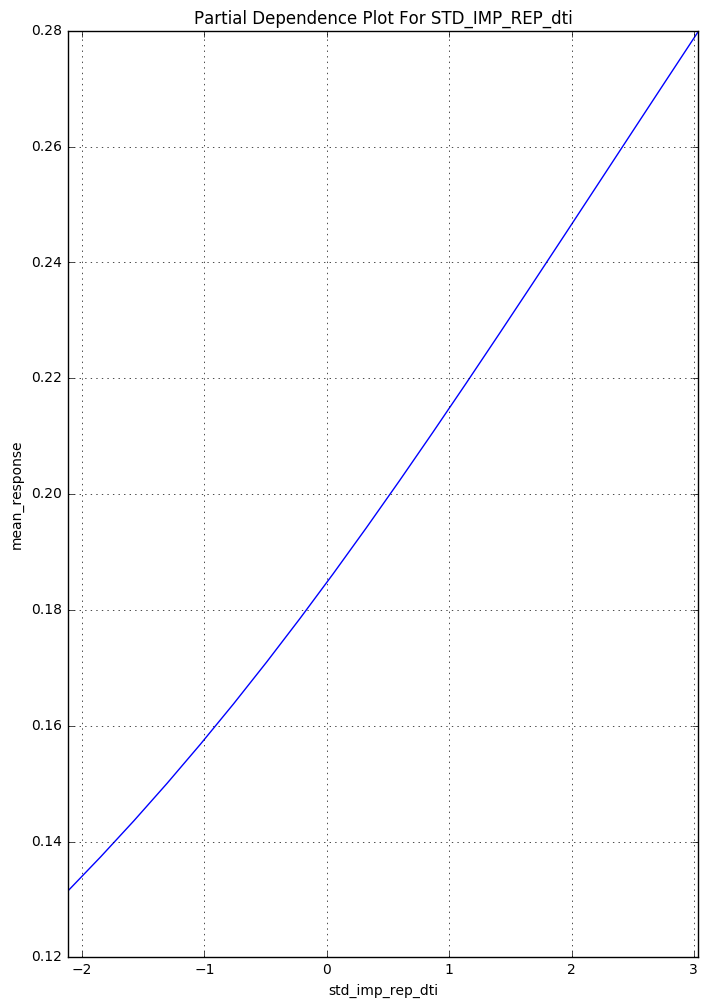

In [16]:
# partial dependence plots are a powerful machine learning interpretation tool
# to calculate partial dependence across the domain a variable
# hold column of interest at constant value
# find the mean prediction of the model with this column constant
# repeat for multiple values of the variable of interest
# h2o has a built-in function for partial dependence as well
par_dep_dti1 = nn_model2.partial_plot(data=train, cols=['STD_IMP_REP_dti'], server=True, plot=True)

In [17]:
# shutdown h2o
h2o.cluster().shutdown(prompt=False)

H2O session _sid_927f closed.
